# Top 5000 Movie Database Analysis


## Loading the Data

I start by loading the data into a pandas dataframe. 


In [284]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



movieDB = pd.read_csv("data/tmdb_5000_movies.csv")
movieDB.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Data Cleaning and Manipulation

It's always important to get a feel for what data we have to play with before we get into the anaylsis.

We find the data is in the following format:
- budget
- genres
- homepage
- id
- keywords
- original_language 
- original_title
- overview
- popularity
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline
- title 
- vote_average
- vote_count 

Let's look at how many entries we have in the table. The dataset said Top 5000 Movie Database.

In [285]:
len(movieDB)

4803

We actually have 4803 entries so it is not quite 5000 but it is close. 

Now most of the categories seem self explanatory. Let's dig a little more into 'status'. From what I can tell most are labeled 'Released'.

In [286]:
len(movieDB[movieDB['status']=='Released'])

4795

In [287]:
movieDB[movieDB['status']!='Released'].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2906,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",https://www.facebook.com/eastsidestorymovie,357837,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 271, ""...",cs,Dancin' It's On,"This coming of age Dance Film, in the spirit o...",0.186234,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-16,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,Dancin' Like You've Never Seen Before,Dancin' It's On,4.3,2
4169,1900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,295886,[],en,Brotherly Love,West Philadelphia basketball star Sergio Taylo...,1.367751,[],[],2015-04-24,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,NaN,Brotherly Love,6.9,21
4178,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.sonyclassics.com/higherground/,50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.699101,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-08-26,841733,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,NaN,Higher Ground,5.3,14
4401,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,43630,[],en,The Helix... Loaded,,0.020600,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-01-01,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,The Helix... Loaded,4.8,2
4453,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,57294,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 97...",en,Crying with Laughter,Powerfully redemptive and darkly comedic reven...,0.108135,"[{""name"": ""Scottish Screen"", ""id"": 698}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-06-01,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,A Bad Trip Down Memory Lane,Crying with Laughter,7.0,1


There are 8 movies that are either listed 'Post Production' or 'Rumored'.

We have to decide what we do with MISSING values. 

In this case, I performed a quick Google search and confirmed that all of the movies have been released. 

Now, that I know all films in my dataframe have been released I can simply drop the column.

In [288]:
movieDB = movieDB.drop('status',1)

I use .fillna() to fill in any NaN's with 9999 to prevent any future issues with MISSING values.

In [289]:
movieDB = movieDB.fillna(9999)

Because I am unfamiliar with this dataset, I need to explore the data to see what types I have to work with.

In [290]:
type(movieDB['release_date'][0])

str

Next, I find that 'release_date' is of the str type. 

I want to have a way to analyze movies by year so I will add a column for that in the dataset

Note: I discovered that one entry in release_date was of type 'float' and would cause code to error when I subscripted. Added initial list comprehension to fix this issue.

In [291]:
changeType = [str(i) for i in movieDB['release_date']] #changing all values to str type
years = [i[0:4] for i in changeType]
movieDB['year'] = [int(i) for i in years]
movieDB.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",John Carter,6.1,2124,2012


## Yearly Counts

Let's start by looking at the data that we have. 

I will start by plotting each movie entry by year.

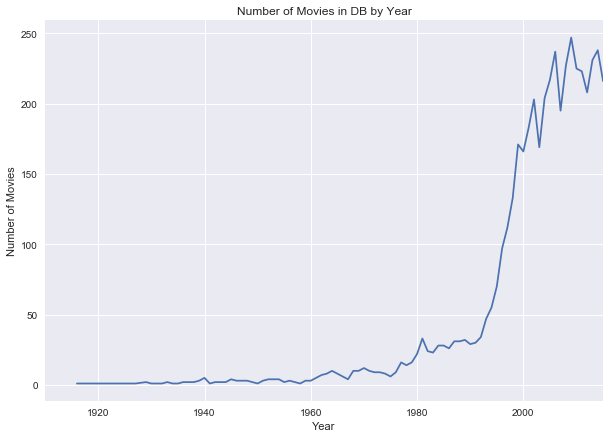

In [292]:
yearlyAnalysis = movieDB[movieDB['year'] < 2016] #dropping nan values (remember nan = 9999)
plt.figure(figsize=(10, 7))
plt.plot(yearlyAnalysis.groupby('year').size()) 
plt.xlim(1910,2015)
plt.title('Number of Movies in DB by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

We can see from the plot that the database contains movies primarily from 1990 and newer. 

Let's investigate into some movie trends per year. 

First I will look at mean budget of movies by year. 

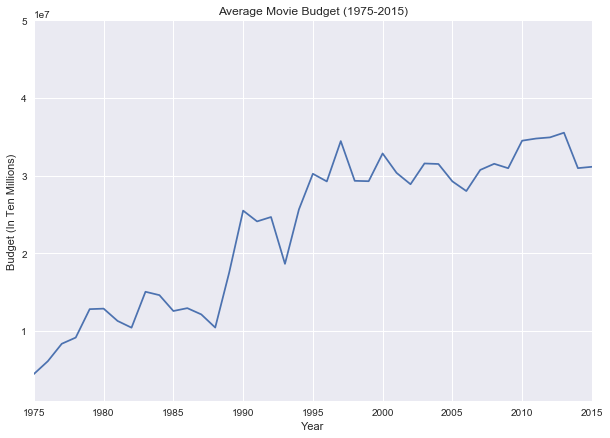

In [294]:
yearlyAvg = yearlyAnalysis.groupby(['year']).mean() # taking mean of all columns by year (saving to be called later)
plt.figure(figsize=(10, 7))
plt.plot(yearlyAvg['budget'].index, [float(i) for i in yearlyAvg['budget']])
plt.xlim(1975,2015)
plt.ylim(1000000,50000000)
plt.title('Average Movie Budget (1975-2015)')
plt.ylabel('Budget (In Ten Millions)')
plt.xlabel('Year')
plt.show()


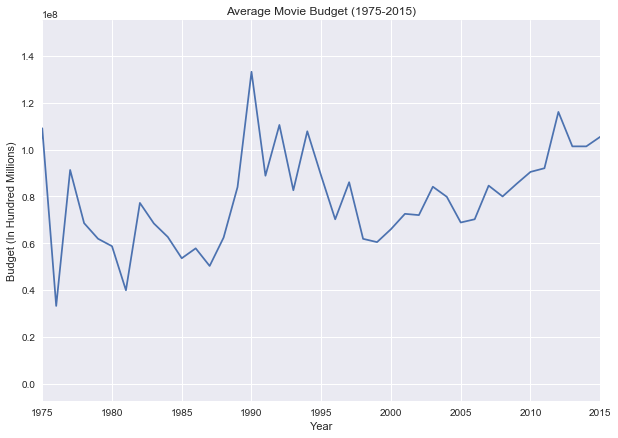

In [297]:
plt.figure(figsize=(10, 7))
plt.plot(yearlyAvg['revenue'].index, [float(i) for i in yearlyAvg['revenue']])
plt.xlim(1975,2015)

plt.title('Average Movie Budget (1975-2015)')
plt.ylabel('Budget (In Hundred Millions)')
plt.xlabel('Year')
plt.show()

## Principle Component Analysis

Let's start doing some analysis with the intention of performing PCA on the dataset.

First, let's use seaborn and look at a heatmap of how correlated the categories are.

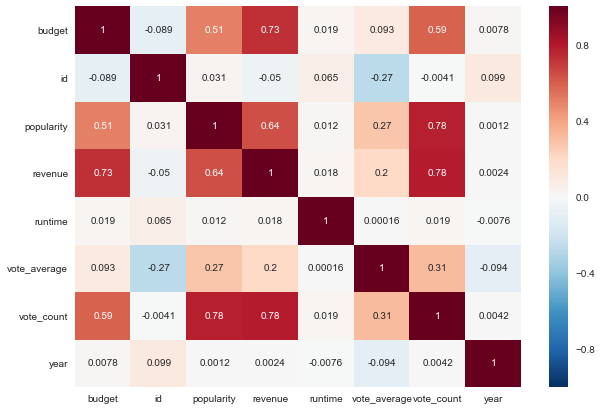

In [303]:
plt.figure(figsize=(10,7))
sns.heatmap(data = movieDB.corr(),annot=True)
plt.show()

We can see that some of the most positive correlations are 'budget', 'revenue', and 'vote_count'.